In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,cross_val_predict,GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import LinearSVR,SVR,NuSVR

from sklearn.metrics import mean_squared_error,mean_absolute_error

import joblib

In [5]:
train_set=pd.read_csv('train_set.csv')
test_set=pd.read_csv('test_set.csv')

In [6]:
X_train=train_set.drop('selling_price',axis=1)
y_train=train_set['selling_price']
X_test=test_set.drop('selling_price',axis=1)
y_test=test_set['selling_price']

In [7]:
X_train_scaled=pd.DataFrame(StandardScaler().fit_transform(X_train),columns=X_train.columns)

In [8]:
X_test_scaled=pd.DataFrame(StandardScaler().fit_transform(X_test),columns=X_test.columns)

In [6]:
## Linear Regression

In [7]:
lin_reg=LinearRegression()
lin_reg_scores=cross_val_score(lin_reg,X_train_scaled,y_train,cv=3,scoring='neg_root_mean_squared_error')
print(lin_reg_scores.mean())

-466362.02991007944


In [8]:
##SVR

In [9]:
svr=SVR()
svr_scores=cross_val_score(svr,X_train_scaled,y_train,cv=3,scoring='neg_root_mean_squared_error')
svr_scores.mean()

-835069.7228353387

In [10]:
## Ridge Regression

In [11]:
ridge=Ridge()
ridge_score=cross_val_score(ridge,X_train_scaled,y_train,cv=3,scoring='neg_root_mean_squared_error')
ridge_score.mean()

-465988.1718875472

In [12]:
## Lasso Regression

In [13]:
lasso=Lasso()
lasso_score=cross_val_score(lasso,X_train_scaled,y_train,cv=3,scoring='neg_root_mean_squared_error')
lasso_score.mean()

-465988.4503259791

In [14]:
## RAndom Forest Regressor

In [73]:
random_for=RandomForestRegressor()
random_for_score=cross_val_score(random_for,X_train_scaled,y_train,cv=3,scoring='neg_root_mean_squared_error')
random_for_score.mean()

-163836.9461780618

In [16]:
## Summarizing above cross validation scores in a tabular form

| Model | Cross Validation Score (Negative Root Mean Squared Error) | 
| --- | --- | 
| Linear Regression | -466362.03 |
| SVR | -835069.72 | 
| Ridge Regression| -465988.17 | 
| Lasso Regression| -465988.45 | 
| RandomForest (Default)| -163836.95 | 

In [17]:
## from above steps we understood that Random Forest Regressor is the best for this given dataset

In [18]:
## now we will focus on RandomForestRegressor 
## But firstly lets store the model

In [19]:
joblib.dump(random_for,'RandomForestRegressor.pkl')

['RandomForestRegressor.pkl']

In [20]:
## Now we will use Grid Search to tune the model

In [21]:
param_grid=[
    {
        'n_estimators':[3,10,30],
        'bootstrap':[True,False],
        'max_features':[2,4,6,8,12,14]
    },
    {
        'bootstrap':[True,False],
        'n_estimators':[3,10,30],
    }
    
]


In [22]:
random_reg_grid=RandomForestRegressor()

In [23]:
grid_search=GridSearchCV(random_reg_grid,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

In [24]:
grid_search.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False],
                          'max_features': [2, 4, 6, 8, 12, 14],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [True, False],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [25]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=8, n_estimators=30)

In [26]:
## as you can see best n_estimators is 30... as 30 is the maximum we provided, we will further increase the n_estimators

In [74]:
param_grid=[
    {
        'n_estimators':[30,40,50,70],
        'bootstrap':[True,False],
        'max_features':[2,4,6,8,12,14]
    },
    {
        'bootstrap':[True,False],
        'n_estimators':[3,10,30,60],
    }
    
]

In [75]:
grid_search=GridSearchCV(random_reg_grid,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

In [76]:
grid_search.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False],
                          'max_features': [2, 4, 6, 8, 12, 14],
                          'n_estimators': [30, 40, 50, 70]},
                         {'bootstrap': [True, False],
                          'n_estimators': [3, 10, 30, 60]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [30]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=8, n_estimators=50)

In [ ]:
## lets check out cv score

In [80]:
random_for_grid=RandomForestRegressor(bootstrap=False, max_features=8, n_estimators=50)

In [81]:
cross_val_score(random_for_grid,X_train_scaled,y_train,cv=3,scoring='neg_root_mean_squared_error').mean()

-161623.4826501824

In [82]:
## the tuned model works slightly better than the default one (sometimes result can be quite unexpected)

In [83]:
## next use Random Search CV

In [84]:
random_search_forest=RandomForestRegressor()

In [85]:
param_grid_randomized={
        'n_estimators':[100,110,120,130,140,150,160,170,180,190],
        'bootstrap':[True,False],
        'max_features':[1,2,3,4,5,6],
        'min_samples_split':[2,3,4,5],
        'min_samples_leaf':[1,2,3,4,5],
        
}
    


In [86]:
random_search=RandomizedSearchCV(random_search_forest,param_grid_randomized,return_train_score=True,scoring='neg_root_mean_squared_error')

In [87]:
random_search.fit(X_train_scaled,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': [1, 2, 3, 4, 5, 6],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 110, 120, 130,
                                                         140, 150, 160, 170,
                                                         180, 190]},
                   return_train_score=True,
                   scoring='neg_root_mean_squared_error')

In [88]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, min_samples_leaf=2,
                      min_samples_split=4)

In [89]:
random_search_model=RandomForestRegressor(bootstrap=False, max_features=4, min_samples_leaf=2,min_samples_split=4)

In [90]:
cross_val_score(random_search_model,X_train_scaled,y_train,cv=3,scoring='neg_root_mean_squared_error').mean()

-167131.2344854168

In [50]:
## Summarizing above cross validation scores 

| Model | Cross Validation Score (Negative Root Mean Squared Error) | 
| --- | --- | 
| RandomForest (Default)| -163836.95 | 
| RandomForest (GridSearch) | -161623.48 | 
| RandomForest Randomized SearchCV | -167131.23 | 


In [91]:
## from above table we found out that RandomForest (GridSearch) model works better than any other models 

In [92]:
## so lets fit the train set & store the best model we got so far

In [102]:
random_for_grid.fit(X_train_scaled,y_train)

RandomForestRegressor(bootstrap=False, max_features=8, n_estimators=50)

In [111]:
joblib.dump(random_for_grid,'final_model.pkl')

['final_model.pkl']

In [2]:
final_model=joblib.load('final_model.pkl')

In [9]:
y_test_predicted=final_model.predict(X_test_scaled)

In [10]:
np.sqrt(mean_squared_error(y_test,y_test_predicted))

221491.8245344129

/home/harshkulkarni/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

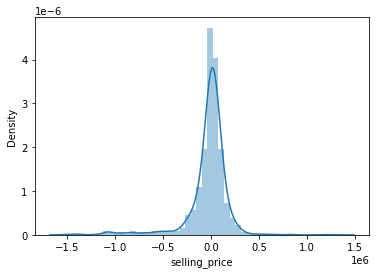

In [13]:
sns.distplot(y_test-y_test_predicted)

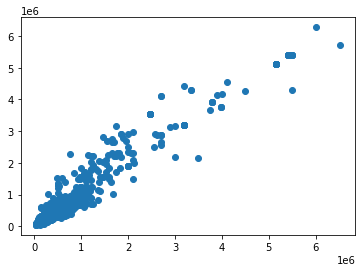

In [15]:
plt.scatter(y_test,y_test_predicted)

In [101]:
## This model further can be enhanced by adding more test data & lowering overfitting